<a href="https://colab.research.google.com/github/mohnishverma87/data-science-foundations/blob/master/House_Prices_Regression_Techniques_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
! git clone https://github.com/mohnishverma87/PGPAIML.git

Cloning into 'PGPAIML'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
#from sklearn.metrics import 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../Documents\ForDataScience\MachineLearning\Practice\Dataset\Housing-Competition"))

# Any results you write to the current directory are saved as output.

# New Section

In [10]:
evaluation=evaluation.truncate(before=-1, after=-1)

NameError: ignored

In [11]:
evaluation = pd.DataFrame({"Model":[],"Details":[],"RMSE":[],"R2-train":[],"Adj-R2-train":[],"R2-test":[],"Adj-R2-test":[],"RMSLE":[],"VARIANCE":[]})
evaluation

,Model,Details,RMSE,R2-train,Adj-R2-train,R2-test,Adj-R2-test,RMSLE,VARIANCE


EDA
1. Load the dataset.
2. Find Num and Categorical variables.
3. Find Most correlated variables with target feature.
4. Handle missing data of the most important features. 
5. Remove any Numerically categorical variable by keeping them in diff list for further addition in model(as of now).
6. Handle the interrelated correlated variables.
7. Apart from ID, check the skewness of the varibales, if they found, handle them.

In [12]:
#1 LOADING THE TRAINING DATA
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Housing-Competition/train.csv')
test_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Housing-Competition/test.csv')
#check for duplicates for Id
idsUnique = len(set(dataset.Id))
idsTotal = dataset.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
#train.drop(['Id'],axis =1,inplace=True)

0


In [13]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
#2. Find Num and Categorical variables.
# Differentiate numerical features (minus the target) and categorical features
print("Numerical features : " + str(len(dataset.select_dtypes(exclude = ["object"]).columns)))
print("Categorical features : " + str(len(dataset.select_dtypes(include = ["object"]).columns)))

Numerical features : 38
Categorical features : 43


In [0]:
# We will take only Numerical Features as of now:
features = [] 
for i in dataset.select_dtypes(exclude = ["object"]).columns:
        features.append(i)

In [16]:
#3. Find Most correlated variables with target feature.
correlations=dataset[features].corr()
print("All numerical features relative to target")
correlations.sort_values(["SalePrice"], ascending = False, inplace=True)
correlations.SalePrice

All numerical features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [0]:
# Hence, the most important features:
num_features = ["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","MasVnrArea"]

In [18]:
#4. Handle missing data of the most important features. 
dataset[num_features].isnull().sum()
#dataset[dataset["MasVnrArea"] = 0]["MasVnrArea"].describe()
#dataset["MasVnrArea"]

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
MasVnrArea      8
dtype: int64

In [0]:
dataset["MasVnrArea"].fillna(dataset["MasVnrArea"].mean(), inplace=True)
test_dataset["MasVnrArea"].fillna(dataset["MasVnrArea"].mean(), inplace=True)

In [20]:
#5. Remove any Numerically categorical variable by replacing astype(object)
#OverallQual is a Categorical Variable"Rates the overall material and finish of the house"
# Hence, converting it to object
num_cat_features = []
#dataset.OverallQual=dataset.OverallQual.astype(object)
num_cat_features.append("OverallQual")
#FullBath , "Full bathrooms above grade"
#dataset.FullBath=dataset.FullBath.astype(object)
num_cat_features.append("FullBath")
#TotRmsAbvGrd , "Total rooms above grade (does not include bathrooms)"
#dataset.TotRmsAbvGrd=dataset.TotRmsAbvGrd.astype(object)
num_cat_features.append("TotRmsAbvGrd")
#set(num_features).remove(num_cat_features)
num_features = [i for i in num_features if i not in num_cat_features]
print("Num_features are", num_features)
print("Num_categorical_features are which we need to add further", num_cat_features)

Num_features are ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'MasVnrArea']
Num_categorical_features are which we need to add further ['OverallQual', 'FullBath', 'TotRmsAbvGrd']


In [21]:
dataset[num_features].columns

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'YearBuilt', 'MasVnrArea'],
      dtype='object')

In [0]:
#6. Handle the interrelated correlated variables.
sns.set()
sns.pairplot(dataset[num_features], size = 2.5)

In [0]:
# Function to create Shaded Pearson Correlation Matrix
def prscorrmatrix(dataframe, col_array):
  correlations = dataframe[col_array].corr()
  mask = np.zeros_like(correlations, dtype = np.bool)
  mask[np.triu_indices_from(mask)]=True
  fig,ax = plt.subplots(figsize=(10,10))
  plt.title("Pearson Correlation Matrix", fontsize=30)
  return sns.heatmap(correlations,vmax=1,square=True,annot=True,mask=mask)

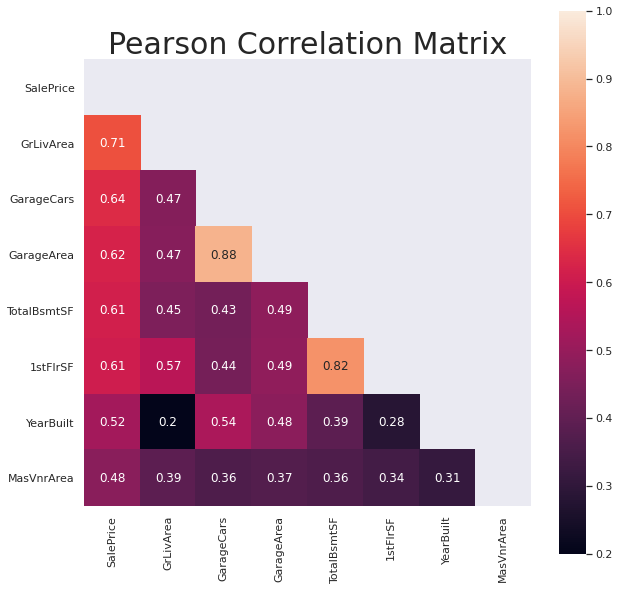

In [23]:
prscorrmatrix(dataset, num_features)

In [0]:
# We see, Garage Cars and Garage Area - Intercorrelated, Hence we will take only GarageArea, it seems more continuous
# We see, 1stFlrSF and TotalBsmtSF - Intercorrelated, Hence we will take only TotalBsmtSF, it seems more continuous
num_features = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','MasVnrArea', 'YearBuilt']

In [0]:
#7. Apart from ID, check the skewness of the varibales, if they found, handle them.
#Draw skew graphs of all features
#sns.distplot(np.log1p(dataset[dataset["MasVnrArea"] != 0]["MasVnrArea"]))
#skew(np.log1p(dataset["MasVnrArea"]))

In [0]:
from scipy.stats import skew
for i,col in enumerate(dataset[num_features].columns):
        plt.figure()
        sns.distplot(dataset[col])
        print("The skewkness factor for",col,"is", skew(dataset[col]))
#skew(dataset["SalePrice"])

**From the above target data info, we see that the data is right skewed.If the dataset skewed, then the ML model wouldn’t 
be able to do a good job of prediction. For skewed dist data, the predicted values would also be skewed.The best way to fix it is to perform a log transform of the same data, with the intent to reduce the skewness.**

In [0]:
for i,col in enumerate(dataset[num_features].columns):
        plt.figure()
        sns.distplot(np.log1p(dataset[col]))
        print("The updated skewkness factor for",col,"after applied log is", skew(np.log1p(dataset[col])))

In [0]:
# By checking the above results, We will apply skew to the following features:
#SalePrice, GrLivArea, MasVnrArea
dataset["SalePrice"] = np.log1p(dataset["SalePrice"])
dataset["GrLivArea"] = np.log1p(dataset["GrLivArea"])
dataset["MasVnrArea"] = np.log1p(dataset["MasVnrArea"])

test_dataset["GrLivArea"] = np.log1p(test_dataset["GrLivArea"])
test_dataset["MasVnrArea"] = np.log1p(test_dataset["MasVnrArea"])

In [0]:
def adjustedR2(r2,n,k):
    # return r2 - (k - 1)/(n - k)*(1 - r2)
    return 1 - ((1 - r2)*(n - 1) / (n - k - 1))

In [0]:
#evaluation.drop(evaluation[evaluation.Model=="Polynomial Linear-3, CV=10"].index, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(dataset[num_features],test_size=0.2,random_state=42)

In [0]:
X_train = train_data.iloc[:,1:].values
y_train = train_data["SalePrice"].values
X_test = test_data.iloc[:,1:].values
y_test = test_data["SalePrice"].values

In [55]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1168, 5) (1168,)
(292, 5) (292,)


In [0]:
def get_validation_curve(dataset, features_array):
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import LinearRegression

  train_data,test_data = train_test_split(dataset[features_array],test_size=0.4,random_state=42)
  X_train = train_data.iloc[:,1:].values
  y_train = train_data["SalePrice"].values
  X_test = test_data.iloc[:,1:].values
  y_test = test_data["SalePrice"].values

  linreg  = LinearRegression()

  train_error = []
  validation_error = []

  for i in range(1, len(X_train)):
    linreg.fit(X_train[:i], y_train[:i])
    y_train_pred = linreg.predict(X_train[:i])
    train_error.append(np.sqrt(mean_squared_error(y_train_pred, y_train[:i])))
    y_test_pred = linreg.predict(X_test)
    validation_error.append(np.sqrt(mean_squared_error(y_test_pred, y_test)))

  plt.figure(figsize=(12,8))
  plt.plot( train_error, label = "TRAINING ERROR")
  plt.plot( validation_error,label = "VALIDATION ERROR")
  plt.legend()
  print("Training Error is ", np.mean(train_error))
  print("Validation Error is ", np.mean(validation_error))
  return plt.show()


['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'YearBuilt']
Training Error is  0.20005101954782936
Validation Error is  0.19411364723635702


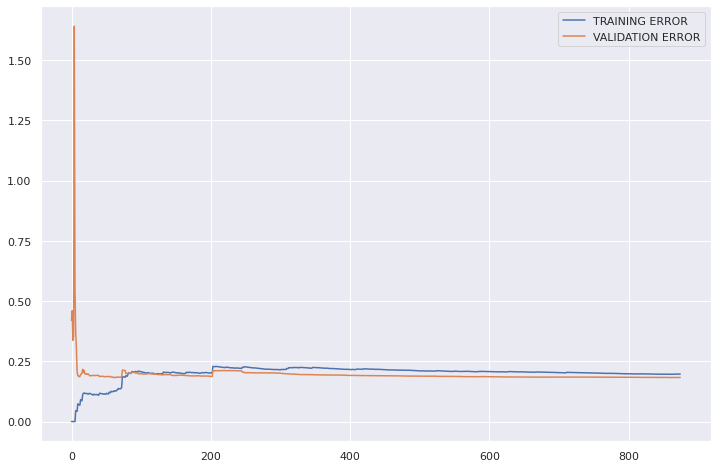

In [30]:
num_features = ['SalePrice' 
                 ,'GrLivArea'
                  ,'GarageArea'
                  ,'TotalBsmtSF'
                  ,'MasVnrArea'
                  ,'YearBuilt'
                 ]
print(num_features)
get_validation_curve(dataset,num_features)

In [72]:
# To Avoid Overfitting in Linear Regression, we use below Regression Technique:
#1. L1 Ridge/Tikhonov Regression
#2. L2 Lasso Regression
#3. Elastic Net

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# alpha = np.linspace(-2,2,num=100)
ridge = Ridge(alpha=0.000000001)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# alpha = np.linspace(-2,2,num=100)
lasso = Lasso(alpha=100)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))

0.764931210128364
0.018579082450326134


In [0]:
from sklearn.metrics import r2_score
R2_test_pred = r2_score(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2_score_train = accuracies.mean()
Adj_R2_array= []
for i in accuracies:
    Adj_R2_array.append(adjustedR2(i,X_train.shape[0],X_train.shape[1]))
Adj_R2_array = np.asarray(Adj_R2_array)
Adj_R2 = Adj_R2_array.mean()
VARIANCE = accuracies.std()
evaluation=evaluation.append({"Model":"Multivariate Linear, CV=10","Details":"","RMSE":rmse, "R2-train":R2_score_train,"Adj-R2-train":Adj_R2,"R2-test-pred":R2_test_pred,"Adj-R2-test":"","RMSLE":"","VARIANCE":VARIANCE},ignore_index=True)

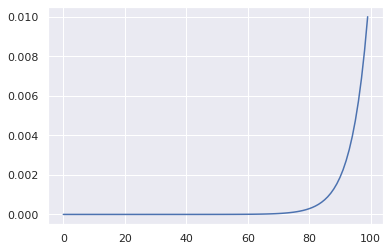

In [47]:
plt.plot(np.logspace(-10,-2,num=100))

In [0]:
evaluation

In [0]:
# Lets have a Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 3)
X_train = train_data.iloc[:,1:].values
y_train = train_data["SalePrice"].values
X_test = test_data.iloc[:,1:].values
y_test = test_data["SalePrice"].values

X_poly_train = polyreg.fit_transform(X_train) 
X_poly_test = polyreg.fit_transform(X_test)

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

from sklearn.model_selection import cross_val_score
#score = 'mean_absolute_error'
accuracies = cross_val_score(linreg,X=X_poly_train,y=y_train, cv=10)
linreg.fit(X_poly_train,y_train)
y_pred = linreg.predict(X_poly_test)


In [0]:
from sklearn.metrics import r2_score
R2_test_pred = r2_score(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2_score_train = accuracies.mean()
Adj_R2_array= []
for i in accuracies:
    Adj_R2_array.append(adjustedR2(i,X_train.shape[0],X_train.shape[1]))
Adj_R2_array = np.asarray(Adj_R2_array)
Adj_R2 = Adj_R2_array.mean()
VARIANCE = accuracies.std()
evaluation=evaluation.append({"Model":"Polynomial Linear-3, CV=10","Details":"","RMSE":rmse, "R2-train":R2_score_train,"Adj-R2-train":Adj_R2,"R2-test-pred":R2_test_pred,"Adj-R2-test":"","RMSLE":"","VARIANCE":VARIANCE},ignore_index=True)

In [0]:
evaluation

In [0]:
# WE WILL EVALUATE XGBOOST MODEL
from xgboost import XGBClassifier
xgb = XGBClassifier()
X_train = train_data.iloc[:,1:].values
y_train = train_data["SalePrice"].values
X_test = test_data.iloc[:,1:].values
y_test = test_data["SalePrice"].values
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
R2_test_pred = r2_score(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2_score_train = accuracies.mean()
Adj_R2_array= []
for i in accuracies:
    Adj_R2_array.append(adjustedR2(i,X_train.shape[0],X_train.shape[1]))
Adj_R2_array = np.asarray(Adj_R2_array)
Adj_R2 = Adj_R2_array.mean()
VARIANCE = accuracies.std()
evaluation=evaluation.append({"Model":"XGBoost","Details":"","RMSE":rmse, "R2-train":R2_score_train,"Adj-R2-train":Adj_R2,"R2-test-pred":R2_test_pred,"Adj-R2-test":"","RMSLE":"","VARIANCE":VARIANCE},ignore_index=True)

In [0]:
evaluation

In [0]:
# SO XGBoost seems to have better prediction, we will take this model.
test_dataset = pd.read_csv("../input/test.csv")
#test_dataset1=test_dataset[features1]
#test_dataset1.head()

In [0]:
test_dataset[num_features[1:]].isnull().sum()

In [0]:
test_dataset["GarageArea"].fillna(test_dataset["GarageArea"].mean(), inplace=True)
test_dataset["TotalBsmtSF"].fillna(test_dataset["TotalBsmtSF"].mean(), inplace=True)
test_dataset["MasVnrArea"].fillna(test_dataset["MasVnrArea"].mean(), inplace=True)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 2)
X_train = train_data.iloc[:,1:].values
y_train = train_data["SalePrice"].values

X_test = test_dataset[num_features[1:]].values

X_poly_train = polyreg.fit_transform(X_train) 
X_poly_test = polyreg.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import cross_val_score
#score = 'mean_absolute_error'
accuracies = cross_val_score(linreg,X=X_poly_train,y=y_train, cv=10)
linreg.fit(X_poly_train,y_train)

y_pred = linreg.predict(X_poly_test)

In [0]:
test_dataset[num_features[1:]].isnull().sum()

In [0]:
test_dataset[num_features[1:]].isnull().sum()

In [0]:
#Remember how we transformed the SalePrice by taking a log of all the prices, Well, now we need to change that back to the original scale. 
#submission_predictions = np.exp(y_pred)
submission_predictions=[]
for i in y_pred:
    submission_predictions.append(np.exp(i))

In [0]:
submission_predictions

In [0]:
submit = pd.DataFrame({
'Id': test_dataset["Id"],
'SalePrice': submission_predictions})


In [0]:
submit["SalePrice"] = submit["SalePrice"].round(3)

In [0]:
submit.to_csv('../Documents\ForDataScience\MachineLearning\Practice\Dataset\Housing-Competition\price-Imp.csv', index=False)

In [0]:
submit

In [0]:
submission_predictions